In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Loading Data

This function will have the whole datafraem as argument even if we don't pass anything to it. For each row of the column "is spam" we check if it's a ham or a spam and assign values based on that.

In [2]:
def convert(row):
    if(row["is spam"]=="ham"):
        return 0
    else:
        return 1

Encoding of the csv file is in latin1 hence it had to be changed. Also the new column names in position 0 and 1 are applied as "is spam" and "text". The first row contained the previous column names v1 and v2 , hence 1'st row is dropped.

In [3]:
cols=[0,1]
newcols=["is spam", "text"]
df=pd.read_csv("sms-spam.csv",usecols=cols, names= newcols, encoding='latin1')
df = df.drop([0], axis=0)
df["is spam"]=df.apply(convert, axis=1)
df.head(10)

,is spam,text
1,0,"Go until jurong point, crazy.. Available only ..."
2,0,Ok lar... Joking wif u oni...
3,1,Free entry in 2 a wkly comp to win FA Cup fina...
4,0,U dun say so early hor... U c already then say...
5,0,"Nah I don't think he goes to usf, he lives aro..."
6,1,FreeMsg Hey there darling it's been 3 week's n...
7,0,Even my brother is not like to speak with me. ...
8,0,As per your request 'Melle Melle (Oru Minnamin...
9,1,WINNER!! As a valued network customer you have...
10,1,Had your mobile 11 months or more? U R entitle...


# Analysing Data

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. Feature Engineering is an art.

Steps which are involved while solving any problem in machine learning are as follows:

Gathering data.
Cleaning data.
Feature engineering.
Defining model.
Training, testing model and predicting the output.
Feature engineering is the most important art in machine learning which creates the huge difference between a good model and a bad model.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 1 to 5572
Data columns (total 2 columns):
is spam    5572 non-null int64
text       5572 non-null object
dtypes: int64(1), object(1)
memory usage: 130.6+ KB


No missing data in the csv file. Hence safe to use further

In [5]:
df.groupby(['is spam']).size()[0]

4825

[`groupby`](https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby) is a powerful way to analyse (and manipulate the data).  
Using the above command, we can see that 747 messages are spam, while 4825 messages are ham. We also observe that most of the message are unique.

Pie Chart

https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

In [6]:
def total(x):
    return (df['is spam'] == x).sum()

In [7]:
hampercent= (total(0)/len(df.index))*100
spampercent=(total(1)/len(df.index))*100

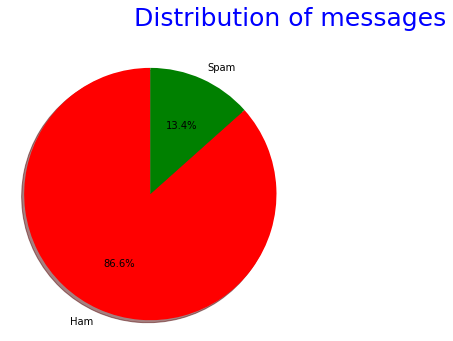

In [8]:
labels = 'Ham', 'Spam'
sizes = [hampercent, spampercent]
fig1, ax1 = plt.subplots()
fig1.set_size_inches(5,5)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True,colors=("r","g"), startangle=90)
ax1.axis('equal') 
plt.title('Distribution of messages',color='b', fontsize="25", position=(1,1.1))
plt.show()

# Adding features


## Percentage digits
If you have gone through the dataset, you would have observed that spam messages have a lot more digits in them as compared to ham messages. So, lets create a feature based on that.m

In [9]:
def percentage_digits(text):
    counter = 0
    for i in text:
        if i.isdigit():
            counter += 1
    return (counter / len(text)) * 100

df['percentage digits'] = df['text'].apply(percentage_digits)
df.head()

,is spam,text,percentage digits
1,0,"Go until jurong point, crazy.. Available only ...",0.000000
2,0,Ok lar... Joking wif u oni...,0.000000
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032
4,0,U dun say so early hor... U c already then say...,0.000000
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000


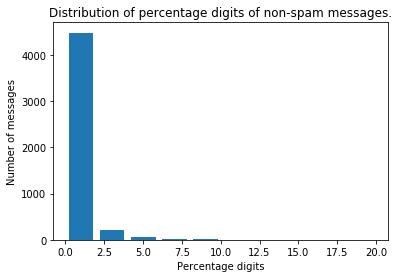

In [10]:
plt.hist(df[df['is spam'] == 0]['percentage digits'], bins=10, range=(0, 20), rwidth=0.8)
plt.xlabel('Percentage digits')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage digits of non-spam messages.')
plt.show()

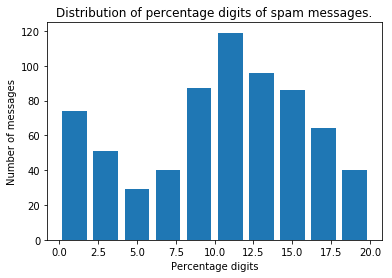

In [11]:

plt.hist(df[df['is spam'] == 1]['percentage digits'], bins=10, range=(0, 20), rwidth=0.8)
plt.xlabel('Percentage digits')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage digits of spam messages.')
plt.show()

## Percentage question mark¶

In [12]:
def percentage_question_mark(text):
    counter = 0
    for i in text:
        if i == '?':
            counter += 1
    return (counter / len(text)) * 100

df['percentage question mark'] = df['text'].apply(percentage_question_mark)
df.head()

,is spam,text,percentage digits,percentage question mark
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0
2,0,Ok lar... Joking wif u oni...,0.000000,0.0
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0
4,0,U dun say so early hor... U c already then say...,0.000000,0.0
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0


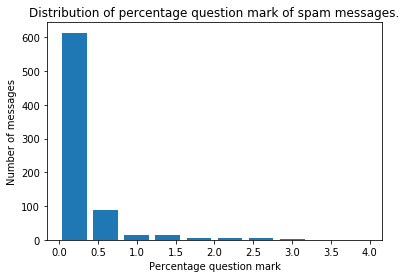

In [13]:
plt.hist(df[df['is spam'] == 1]['percentage question mark'], bins=10, range=(0, 4), rwidth=0.8)
plt.xlabel('Percentage question mark')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage question mark of spam messages.')
plt.show()

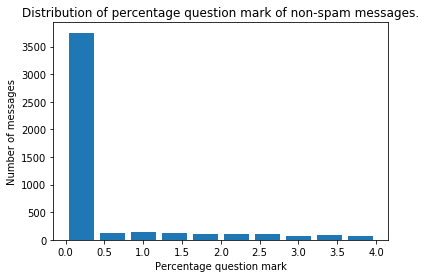

In [14]:
plt.hist(df[df['is spam'] == 0]['percentage question mark'], bins=10, range=(0, 4), rwidth=0.8)
plt.xlabel('Percentage question mark')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage question mark of non-spam messages.')
plt.show()


## Percentage exclamation mark

In [15]:
def percentage_exclamation_mark(text):
    counter = 0
    for i in text:
        if i == '!':
            counter += 1
    return (counter / len(text)) * 100

df['percentage exclamation mark'] = df['text'].apply(percentage_exclamation_mark)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0
2,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0
4,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0


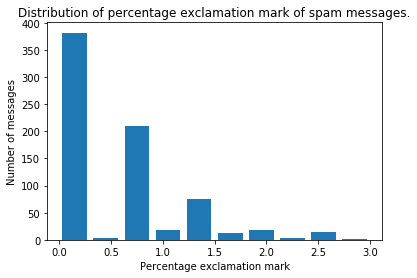

In [16]:
plt.hist(df[df['is spam'] == 1]['percentage exclamation mark'], bins=10, range=(0, 3), rwidth=0.8)
plt.xlabel('Percentage exclamation mark')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage exclamation mark of spam messages.')
plt.show()

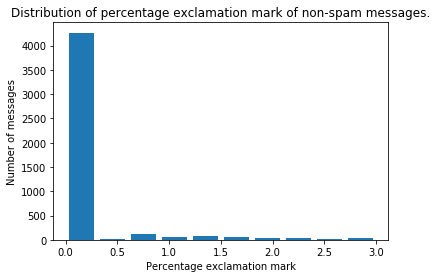

In [17]:
plt.hist(df[df['is spam'] == 0]['percentage exclamation mark'], bins=10, range=(0, 3), rwidth=0.8)
plt.xlabel('Percentage exclamation mark')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage exclamation mark of non-spam messages.')
plt.show()

## Percentage caps

In [18]:
def percentage_caps(text):
    counter = 0
    for i in text:
        if i.isupper():
            counter += 1
    return (counter / len(text)) * 100

df['percentage caps'] = df['text'].apply(percentage_caps)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage caps
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0,2.702703
2,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0,6.896552
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0,6.451613
4,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0,4.081633
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0,3.278689


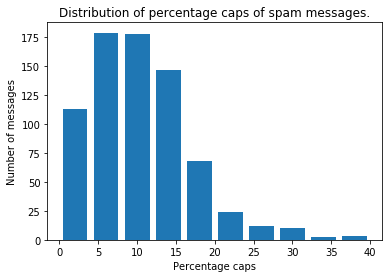

In [19]:
plt.hist(df[df['is spam'] == 1]['percentage caps'], bins=10, range=(0, 40), rwidth=0.8)
plt.xlabel('Percentage caps')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage caps of spam messages.')
plt.show()

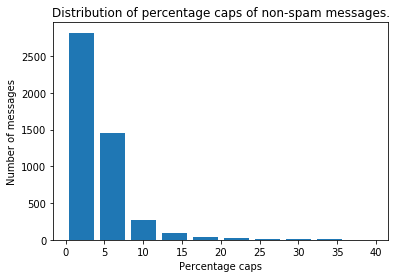

In [20]:
plt.hist(df[df['is spam'] == 0]['percentage caps'], bins=10, range=(0, 40), rwidth=0.8)
plt.xlabel('Percentage caps')
plt.ylabel('Number of messages')
plt.title('Distribution of percentage caps of non-spam messages.')
plt.show()

## Length

In [21]:

df['length'] = df['text'].apply(len)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage caps,length
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0,2.702703,111
2,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0,6.896552,29
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0,6.451613,155
4,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0,4.081633,49
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0,3.278689,61


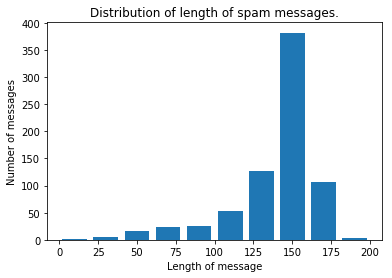

In [22]:
plt.hist(df[df['is spam'] == 1]['length'], bins=10, range=(0, 200), rwidth=0.8)
plt.xlabel('Length of message')
plt.ylabel('Number of messages')
plt.title('Distribution of length of spam messages.')
plt.show()


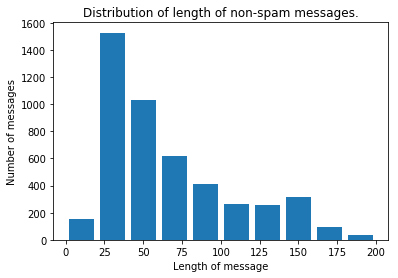

In [23]:
plt.hist(df[df['is spam'] == 0]['length'], bins=10, range=(0, 200), rwidth=0.8)
plt.xlabel('Length of message')
plt.ylabel('Number of messages')
plt.title('Distribution of length of non-spam messages.')
plt.show()

## Appearance of word free,Free, FREE etc

In [24]:
def percentage_free(text):
    counter = 0
    for i in text:
        if "free" in text.lower():
            counter += 1
            break
    return counter

df['percentage free'] = df['text'].apply(percentage_free)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage caps,length,percentage free
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0,2.702703,111,0
2,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0,6.896552,29,0
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0,6.451613,155,1
4,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0,4.081633,49,0
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0,3.278689,61,0


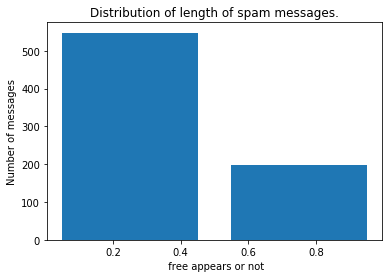

In [25]:
plt.hist(df[df['is spam'] == 1]['percentage free'], bins=2, range=(0, 1), rwidth=0.8)
plt.xlabel(' free appears or not')
plt.ylabel('Number of messages')
plt.title('Distribution of length of spam messages.')
plt.show()

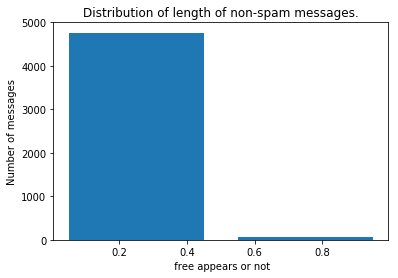

In [26]:
plt.hist(df[df['is spam'] == 0]['percentage free'], bins=2, range=(0, 1), rwidth=0.8)
plt.xlabel(' free appears or not')
plt.ylabel('Number of messages')
plt.title('Distribution of length of non-spam messages.')
plt.show()

## Appearance of please

In [27]:
def percentage_please(text):
    counter = 0
    for i in text:
        if "please" in text.lower():
            counter += 1
            break
    return counter

df['percentage please'] = df['text'].apply(percentage_please)
df.head()

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage caps,length,percentage free,percentage please
1,0,"Go until jurong point, crazy.. Available only ...",0.000000,0.0,0.0,2.702703,111,0,0
2,0,Ok lar... Joking wif u oni...,0.000000,0.0,0.0,6.896552,29,0,0
3,1,Free entry in 2 a wkly comp to win FA Cup fina...,16.129032,0.0,0.0,6.451613,155,1,0
4,0,U dun say so early hor... U c already then say...,0.000000,0.0,0.0,4.081633,49,0,0
5,0,"Nah I don't think he goes to usf, he lives aro...",0.000000,0.0,0.0,3.278689,61,0,0


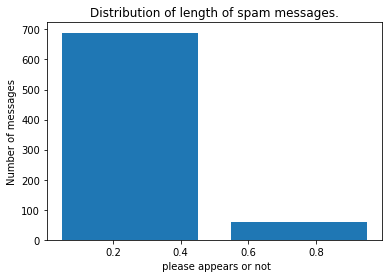

In [28]:
plt.hist(df[df['is spam'] == 1]['percentage please'], bins=2, range=(0, 1), rwidth=0.8)
plt.xlabel(' please appears or not')
plt.ylabel('Number of messages')
plt.title('Distribution of length of spam messages.')
plt.show()

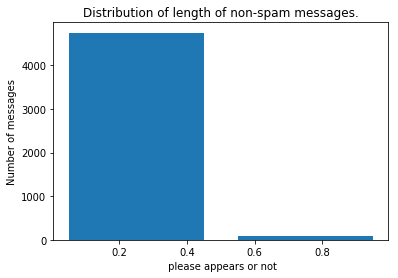

In [29]:
plt.hist(df[df['is spam'] == 0]['percentage please'], bins=2, range=(0, 1), rwidth=0.8)
plt.xlabel(' please appears or not')
plt.ylabel('Number of messages')
plt.title('Distribution of length of non-spam messages.')
plt.show()

## Creating Features from the text


Uptil now, we have created additional features from the text. But we have not represented the text itself.

Remember that machine learning algorithms such as Logistic Regression work by multiplying the feature values by some (learnable) weights. Clealy, we can't use text as it as feature. We need to convert into numbers, a form machine learning algorithm can deal with.

str.replace(old, new[, max])

.isalpha This method returns true if all characters in the string are alphabetic and there is at least one character, false otherwise.

In [30]:
import nltk

In [31]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize# Import the stop word list
print (stopwords.words("english")) 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Clean text function will remove all the stopwords from the text

## Functions Used
.replace() is used to replace a particular thing with another
<br/>
.lower() converts to lowercase <br/>
.split() splits based on spaces and makes a list<br/>
s.join() joins the list with s eg s="-" and list [1,2]. the result will be 1-2 <br/>
filter filters out values from a list based on certain conditions specified as lambda x: and returns a list<br/>

In [32]:
def isalpha(word):
    word = word.replace('.', '')
    return word.isalpha()
def clean_sms(text):
    text = text.lower()
    text=text.split()
    return (' '.join(filter(lambda x: isalpha(x) and x not in stopwords.words("english"), text)).replace('.', '').split())

fit_transform() does two functions: First, it fits the model
and learns the vocabulary; second, it transforms our training data
into feature vectors. The input to fit_transform should be a list of 
strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

Numpy arrays are easy to work with, so convert the result to an 
array
train_data_features = train_data_features.toarray()
min_df = 5 means "ignore terms that appear in less than 5 documents".

In [33]:
cv = CountVectorizer(strip_accents='ascii', min_df=5, analyzer=clean_sms)
train_features=cv.fit_transform(df['text'])
train_features=train_features.toarray()
df = pd.concat([df, pd.DataFrame(train_features, columns=cv.get_feature_names(), index=np.arange(1, df.shape[0] + 1))], axis=1)
df.head(2)

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage caps,length,percentage free,percentage please,abiola,...,yo,yoga,you,yours,yr,yrs,yun,yup,zed,ìï
1,0,"Go until jurong point, crazy.. Available only ...",0.0,0.0,0.0,2.702703,111,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,Ok lar... Joking wif u oni...,0.0,0.0,0.0,6.896552,29,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.groupby('is spam').mean()

,percentage digits,percentage question mark,percentage exclamation mark,percentage caps,length,percentage free,percentage please,abiola,able,about,...,yo,yoga,you,yours,yr,yrs,yun,yup,zed,ìï
is spam,,,,,,,,,,,,,,,,,,,,,
0,0.420082,0.544954,0.233188,5.952566,71.023627,0.013679,0.016166,0.00228,0.005389,0.001036,...,0.005389,0.001244,0.017409,0.000622,0.000622,0.001036,0.001036,0.008497,0.000000,0.010777
1,11.579405,0.169521,0.524716,11.061228,138.866131,0.266399,0.077644,0.00000,0.000000,0.000000,...,0.001339,0.000000,0.010710,0.010710,0.014726,0.004016,0.000000,0.000000,0.006693,0.000000


# Training model and calculating accuracy

In [40]:
X=df.drop(columns=['is spam', 'text'])
y=df['is spam']
y.head(2)

1    0
2    0
Name: is spam, dtype: int64

In [41]:
print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (5572, 1458)
y.shape: (5572,)


## Splitting the dataset

 we keep 60% of the data in training set, 20% of the data in validation set, and 20% of the data in test set.

In [44]:
X_train, X_valtest, y_train,y_valtest= train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_validation, y_test, y_validation= train_test_split(X_valtest,y_valtest, test_size=0.5, random_state=42)

In [45]:
print("Train dataset size: ", X_train.shape[0])
print("Validation dataset size: ", X_validation.shape[0])
print("Test size: ", X_test.shape[0])

Train dataset size:  3343
Validation dataset size:  1115
Test size:  1114


### Logistic Regression

In [89]:
clf1 = LogisticRegression(C=2.8)
clf1 = clf1.fit(X_train, y_train)

In [90]:
print(classification_report(y_validation, clf1.predict(X_validation), target_names=['ham', 'spam']))
print('F1 score:', f1_score(y_validation, clf1.predict(X_validation)))

             precision    recall  f1-score   support

        ham       0.99      0.99      0.99       975
       spam       0.96      0.96      0.96       140

avg / total       0.99      0.99      0.99      1115

F1 score: 0.9571428571428572


### Naive Bayes

GaussianNB

In [77]:
clf = GaussianNB()
clf=  clf.fit(X_train, y_train)

In [78]:
print(classification_report(y_validation, clf.predict(X_validation), target_names=['ham', 'spam']))
print('F1 score:', f1_score(y_validation, clf.predict(X_validation)))

             precision    recall  f1-score   support

        ham       0.98      0.81      0.89       975
       spam       0.40      0.89      0.56       140

avg / total       0.91      0.82      0.85      1115

F1 score: 0.5555555555555555


MultinomialNB

In [79]:
clf = MultinomialNB()
clf=  clf.fit(X_train, y_train)

In [80]:
print(classification_report(y_validation, clf.predict(X_validation), target_names=['ham', 'spam']))
print('F1 score:', f1_score(y_validation, clf.predict(X_validation)))

             precision    recall  f1-score   support

        ham       0.99      0.97      0.98       975
       spam       0.81      0.94      0.87       140

avg / total       0.97      0.96      0.97      1115

F1 score: 0.8675496688741722


SVM

In [87]:
clf = SVC(C=0.5)
clf=  clf.fit(X_train, y_train)

In [88]:
print(classification_report(y_validation, clf.predict(X_validation), target_names=['ham', 'spam']))
print('F1 score:', f1_score(y_validation, clf.predict(X_validation)))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99       975
       spam       0.98      0.84      0.90       140

avg / total       0.98      0.98      0.98      1115

F1 score: 0.9034749034749034


In [91]:
y_actual = y_test
y_predicted = clf1.predict(X_test)

In [92]:
true_positives = X_test[(y_actual == 1) & (y_predicted == 1)]
true_negatives = X_test[(y_actual == 0) & (y_predicted == 0)]
false_positives = X_test[(y_actual == 0) & (y_predicted == 1)]
false_negatives = X_test[(y_actual == 1) & (y_predicted == 0)]

In [93]:
precision = true_positives.shape[0] / (true_positives.shape[0] + false_positives.shape[0])
print("Precision:", precision)
recall = true_positives.shape[0] / (true_positives.shape[0] + false_negatives.shape[0])
print("Recall:", recall)
f1_score = 2 * precision * recall / (precision + recall)
print("F1 score:", f1_score)

Precision: 0.9673202614379085
Recall: 0.9308176100628931
F1 score: 0.9487179487179488


#### Places where it failed

In [95]:
df.loc[list(false_positives.index)]

,is spam,text,percentage digits,percentage question mark,percentage exclamation mark,percentage caps,length,percentage free,percentage please,abiola,...,yo,yoga,you,yours,yr,yrs,yun,yup,zed,ìï
1612,0,645,100.000000,0.000000,0.0,0.000000,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1085,0,For me the love should start with attraction.i...,0.000000,0.000000,0.0,1.318681,910,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1579,0,How to Make a girl Happy? It's not at all diff...,0.654664,0.163666,0.0,4.582651,611,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5452,0,Just sing HU. I think its also important to fi...,0.000000,0.000000,0.0,2.390438,251,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5360,0,This is ur face test ( 1 2 3 4 5 6 7 8 9 &lt;...,6.766917,0.000000,0.0,0.751880,133,0,0,0,...,0,0,0,0,0,0,0,0,0,0
